# Random Walks and Monte Carlo Simulation

_How to generate meaningful, reasonable scenarios for asset returns using a random walk mode_

* drift of return process = risk-free rate plus risk premimum (vol * sr)
* We have a model that considers the shift in the output as well as the individual input variables (in the real world interest rates, volatility, and Sharpe ratio changes)
* Brownian motion used for simulation, random walk

In [18]:
import numpy as np
import pandas as pd

# Geometric brownian notion
def gbm_0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """Evolution of a stock price using a geomertric Brownian mition model"""
    #How much to change the time per year
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    # We want to generate a matrix/array that has as many rows as there are steps and as 
    # many colums as there are scenarios
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # To prices
    prices = s_0 * (1 + rets).cumprod()
    return prices  

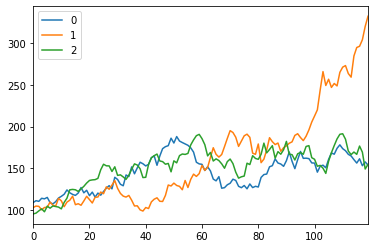

In [19]:
p = gbm_0(10, n_scenarios=3)
p.plot()

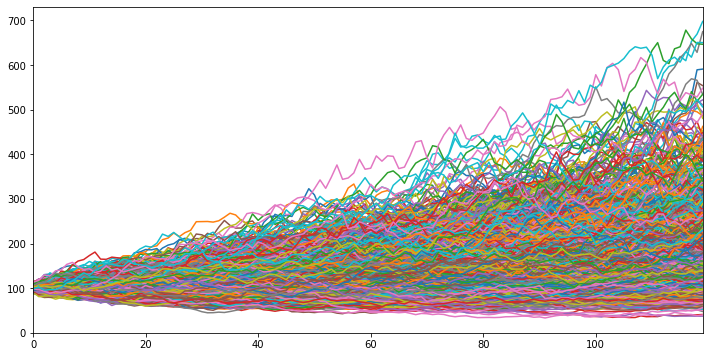

In [20]:
p = gbm_0(10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [26]:
#The execution of the number generation is quick but the plotting is slow
# The gbm can however also be sped up, by bringing the scaling and addition into the
# normal dist calculation
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """Evolution of a stock price using a geomertric Brownian mition model"""
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_one = np.random.normal(loc=(1 + mu*dt),scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_one[0] = 1 # Want all to start at same point
    prices = s_0 * pd.DataFrame(rets_plus_one).cumprod()
    return prices

In [22]:
%timeit gbm_0(n_years=5, n_scenarios=1000)

484 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit gbm(n_years=5, n_scenarios=1000)

235 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


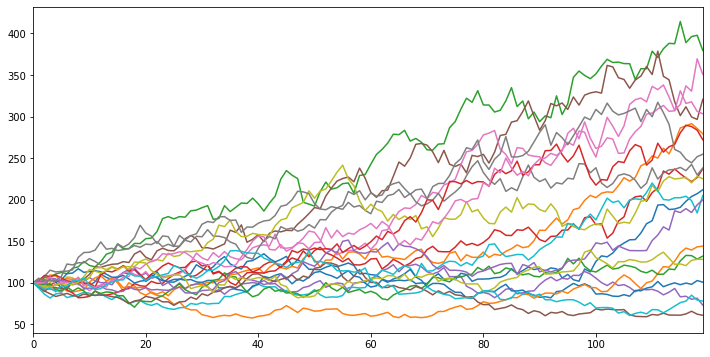

In [27]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

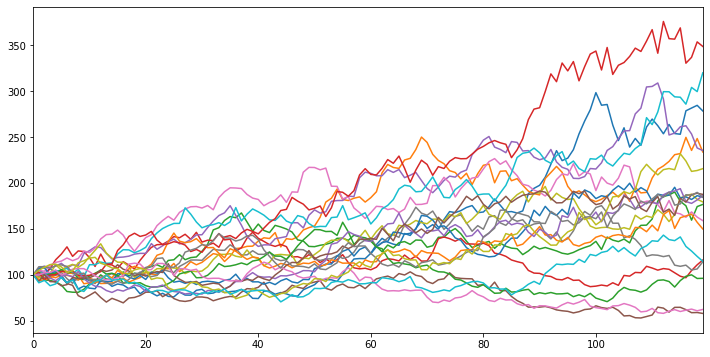

In [28]:
from my_modules import model
model.gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))